#Modeling Using Transfer Learning NASNetMobile

##Import Library

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from pathlib import Path
import os.path
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_path= Path('/content/drive/MyDrive/Bangkit/Training')

In [ ]:
filepaths = pd.Series(list(image_path.glob(r'**/*.png')), name='Filepath').astype(str)
rate = pd.Series(filepaths.apply(lambda x: os.path.split(os.path.split(x)[0])[1]), name='Rate').astype(np.int)

images = pd.concat([filepaths, rate], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
train_df, test_df = train_test_split(images, test_size=0.2, shuffle=True, random_state=1)

In [ ]:
train_df

,Filepath,Rate
374,/content/drive/MyDrive/Bangkit/Training/60/w00...,60
366,/content/drive/MyDrive/Bangkit/Training/70/w01...,70
791,/content/drive/MyDrive/Bangkit/Training/50/w00...,50
600,/content/drive/MyDrive/Bangkit/Training/20/w01...,20
108,/content/drive/MyDrive/Bangkit/Training/90/w01...,90
...,...,...
715,/content/drive/MyDrive/Bangkit/Training/50/w00...,50
767,/content/drive/MyDrive/Bangkit/Training/30/w00...,30
72,/content/drive/MyDrive/Bangkit/Training/30/w00...,30
235,/content/drive/MyDrive/Bangkit/Training/90/w00...,90


In [ ]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)


In [ ]:
train=train_gen.flow_from_dataframe(
dataframe=train_df,
x_col="Filepath",
y_col="Rate",
target_size=(224,224),
color_mode="rgb",
class_mode="raw",
batch_size=32,
shuffle=True,
seed=42,
subset="training")

Found 519 validated image filenames.


In [ ]:
test=test_gen.flow_from_dataframe(
dataframe=test_df,
x_col="Filepath",
y_col="Rate",
target_size=(224,224),
color_mode="rgb",
class_mode="raw",
batch_size=32,
shuffle=False)

Found 162 validated image filenames.


In [ ]:
val_images = train_gen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Rate',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

Found 129 validated image filenames.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
from glob import glob
from random import shuffle
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution1D, concatenate, SpatialDropout1D, GlobalMaxPool1D, GlobalAvgPool1D, Embedding, \
    Conv2D, SeparableConv1D, Add, BatchNormalization, Activation, GlobalAveragePooling2D, LeakyReLU, Flatten
from keras.layers import Dense, Input, Dropout, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D
# from keras.layers.pooling import _GlobalPooling1D
from keras.losses import mae, sparse_categorical_crossentropy, binary_crossentropy
from keras.models import Model
from keras.applications.nasnet import NASNetMobile, NASNetLarge, preprocess_input
# from keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from imgaug import augmenters as iaa
import imgaug as ia
# print(os.listdir('/content/drive'))

# Any results you write to the current directory are saved as output.

In [ ]:
import numpy as np
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow import random

NASNetMobile_model = tensorflow.keras.applications.NASNetMobile()

24240128/24227760 [==============================] - 1s 0us/step


In [ ]:
def get_model_classif_nasnet():
    inputs = Input((224, 224, 3))
    base_model = NASNetMobile(include_top=False, input_shape=(224, 224, 3))#, weights=None
    x = base_model(inputs)
    out1 = GlobalMaxPooling2D()(x)
    out2 = GlobalAveragePooling2D()(x)
    out3 = Flatten()(x)
    out = Concatenate(axis=-1)([out1, out2, out3])
    out = Dense(1)(out)
    model = Model(inputs, out)
    model.compile(optimizer='Adam', loss='mse', metrics=['mse'])
    model.summary()

    return model

In [ ]:
model = get_model_classif_nasnet()

20004864/19993432 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 NASNet (Functional)            (None, 7, 7, 1056)   4269716     ['input_2[0][0]']                
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 1056)        0           ['NASNet[0][0]']                 
 xPooling2D)                                                                                      
                             

In [ ]:
# batch_size=32
# h5_path = "model.h5"
# checkpoint = ModelCheckpoint(h5_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# history = model.fit_generator(
#     data_gen(train, id_label_map, batch_size, augment=True),
#     validation_data=data_gen(val, id_label_map, batch_size),
#     epochs=2, verbose=1,
#     callbacks=[checkpoint],
#     steps_per_epoch=len(train) // batch_size,
#     validation_steps=len(val) // batch_size)
# batch_size=64
# history = model.fit_generator(
#     data_gen(train, id_label_map, batch_size, augment=True),
#     validation_data=data_gen(val, id_label_map, batch_size),
#     epochs=6, verbose=1,
#     callbacks=[checkpoint],
#     steps_per_epoch=len(train) // batch_size,
#     validation_steps=len(val) // batch_size)

# model.load_weights(h5_path)

In [ ]:
history=model.fit(train,validation_data=val_images,epochs=10)

Epoch 1/10
17/17 [==============================] - 372s 20s/step - loss: 682.7290 - mse: 682.7290 - val_loss: 1154.6694 - val_mse: 1154.6694
Epoch 2/10
17/17 [==============================] - 23s 1s/step - loss: 365.3596 - mse: 365.3596 - val_loss: 1805.7382 - val_mse: 1805.7382
Epoch 3/10
17/17 [==============================] - 22s 1s/step - loss: 294.0574 - mse: 294.0574 - val_loss: 1739.6843 - val_mse: 1739.6843
Epoch 4/10
17/17 [==============================] - 23s 1s/step - loss: 252.6648 - mse: 252.6648 - val_loss: 956.6138 - val_mse: 956.6138
Epoch 5/10
17/17 [==============================] - 23s 1s/step - loss: 201.0795 - mse: 201.0795 - val_loss: 2026.7842 - val_mse: 2026.7842
Epoch 6/10
17/17 [==============================] - 23s 1s/step - loss: 190.6381 - mse: 190.6381 - val_loss: 2368.2236 - val_mse: 2368.2236
Epoch 7/10
17/17 [==============================] - 23s 1s/step - loss: 108.4495 - mse: 108.4495 - val_loss: 3413.6973 - val_mse: 3413.6973
Epoch 8/10
17/17 [==

In [ ]:
import plotly.express as px
fig = px.line(
    history.history,
    y=['loss', 'val_loss'],
    labels={'index': "Epoch", 'value': "Loss"},
    title="Model"
)

fig.show()

## Predicting Data Testing

In [ ]:
image_path2 = Path('/content/drive/MyDrive/Bangkit/Testing')
filepaths2 = pd.Series(list(image_path2.glob(r'**/*.png')), name='Filepath').astype(str)

testing_df = pd.concat([filepaths2], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [ ]:
testing_df

,Filepath
0,/content/drive/MyDrive/Bangkit/Testing/w0002_s...
1,/content/drive/MyDrive/Bangkit/Testing/w0003_s...
2,/content/drive/MyDrive/Bangkit/Testing/w0001_s...
3,/content/drive/MyDrive/Bangkit/Testing/w0006_s...
4,/content/drive/MyDrive/Bangkit/Testing/w0004_s...
5,/content/drive/MyDrive/Bangkit/Testing/w0004_s...
6,/content/drive/MyDrive/Bangkit/Testing/w0009_s...
7,/content/drive/MyDrive/Bangkit/Testing/w0003_s...
8,/content/drive/MyDrive/Bangkit/Testing/w0001_s...


In [ ]:
testing_df['Rate']=testing_df.index

In [ ]:
testing_df

,Filepath,Rate
0,/content/drive/MyDrive/Bangkit/Testing/w0002_s...,0
1,/content/drive/MyDrive/Bangkit/Testing/w0003_s...,1
2,/content/drive/MyDrive/Bangkit/Testing/w0001_s...,2
3,/content/drive/MyDrive/Bangkit/Testing/w0006_s...,3
4,/content/drive/MyDrive/Bangkit/Testing/w0004_s...,4
5,/content/drive/MyDrive/Bangkit/Testing/w0004_s...,5
6,/content/drive/MyDrive/Bangkit/Testing/w0009_s...,6
7,/content/drive/MyDrive/Bangkit/Testing/w0003_s...,7
8,/content/drive/MyDrive/Bangkit/Testing/w0001_s...,8


In [ ]:
testing=test_gen.flow_from_dataframe(
dataframe=testing_df,
x_col="Filepath",
y_col="Rate",
target_size=(224,224),
color_mode="rgb",
class_mode="raw",
batch_size=32,
shuffle=False)

Found 9 validated image filenames.


In [ ]:
predicted_ages2 = np.squeeze(model.predict(testing))

In [ ]:
data_prediksi = pd.DataFrame(predicted_ages2, columns=['Pred_Rate'])
data_prediksi

In [ ]:

frames2=[testing_df,data_prediksi]
final = pd.concat(frames2, axis=1)
final = final.drop(columns=['Rate'])
final

In [ ]:
final.info()

In [ ]:
final['Pred_Rate'] = final['Pred_Rate'].astype('int')

In [ ]:
final

#Modeling Using Transfer Learning EfficientNetB0

##Import Library

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from pathlib import Path
import os.path
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_path= Path('/content/drive/MyDrive/Bangkit/Training')

In [ ]:
filepaths = pd.Series(list(image_path.glob(r'**/*.png')), name='Filepath').astype(str)
rate = pd.Series(filepaths.apply(lambda x: os.path.split(os.path.split(x)[0])[1]), name='Rate').astype(np.int)

images = pd.concat([filepaths, rate], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
train_df, test_df = train_test_split(images, test_size=0.3, shuffle=True, random_state=1)

In [ ]:
train_df

,Filepath,Rate
119,/content/drive/MyDrive/Bangkit/Training/60/w00...,60
82,/content/drive/MyDrive/Bangkit/Training/40/w00...,40
415,/content/drive/MyDrive/Bangkit/Training/40/w00...,40
671,/content/drive/MyDrive/Bangkit/Training/70/w00...,70
529,/content/drive/MyDrive/Bangkit/Training/30/w00...,30
...,...,...
715,/content/drive/MyDrive/Bangkit/Training/50/w00...,50
767,/content/drive/MyDrive/Bangkit/Training/30/w00...,30
72,/content/drive/MyDrive/Bangkit/Training/30/w00...,30
235,/content/drive/MyDrive/Bangkit/Training/90/w00...,90


In [ ]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)


In [ ]:
train=train_gen.flow_from_dataframe(
dataframe=train_df,
x_col="Filepath",
y_col="Rate",
target_size=(224,224),
color_mode="rgb",
class_mode="raw",
batch_size=32,
shuffle=True,
seed=42,
subset="training")

Found 397 validated image filenames.


In [ ]:
test=test_gen.flow_from_dataframe(
dataframe=test_df,
x_col="Filepath",
y_col="Rate",
target_size=(224,224),
color_mode="rgb",
class_mode="raw",
batch_size=32,
shuffle=False)

Found 243 validated image filenames.


In [ ]:
val_images = train_gen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Rate',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

Found 170 validated image filenames.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
from glob import glob
from random import shuffle
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution1D, concatenate, SpatialDropout1D, GlobalMaxPool1D, GlobalAvgPool1D, Embedding, \
    Conv2D, SeparableConv1D, Add, BatchNormalization, Activation, GlobalAveragePooling2D, LeakyReLU, Flatten
from keras.layers import Dense, Input, Dropout, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D
# from keras.layers.pooling import _GlobalPooling1D
from keras.losses import mae, sparse_categorical_crossentropy, binary_crossentropy
from keras.models import Model
from keras.applications.nasnet import NASNetMobile, NASNetLarge, preprocess_input
# from keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from imgaug import augmenters as iaa
import imgaug as ia
# print(os.listdir('/content/drive'))

# Any results you write to the current directory are saved as output.

In [ ]:
import numpy as np
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow import random

NASNetMobile_model = tensorflow.keras.applications.EfficientNetB0()

In [ ]:
def get_model_classif_nasnet():
    inputs = Input((224, 224, 3))
    base_model = EfficientNetB0(include_top=False, input_shape=(224, 224, 3))#, weights=None
    x = base_model(inputs)
    out1 = GlobalMaxPooling2D()(x)
    out2 = GlobalAveragePooling2D()(x)
    out3 = Flatten()(x)
    out = Concatenate(axis=-1)([out1, out2, out3])
    out = Dense(1)(out)
    model = Model(inputs, out)
    model.compile(optimizer='Adam', loss='mse', metrics=['mse'])
    model.summary()

    return model

In [ ]:
model = get_model_classif_nasnet()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 efficientnetb0 (Functional)    (None, 7, 7, 1280)   4049571     ['input_11[0][0]']               
                                                                                                  
 global_max_pooling2d_2 (Global  (None, 1280)        0           ['efficientnetb0[0][0]']         
 MaxPooling2D)                                                                                    
                                                                                            

In [ ]:
# batch_size=32
# h5_path = "model.h5"
# checkpoint = ModelCheckpoint(h5_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# history = model.fit_generator(
#     data_gen(train, id_label_map, batch_size, augment=True),
#     validation_data=data_gen(val, id_label_map, batch_size),
#     epochs=2, verbose=1,
#     callbacks=[checkpoint],
#     steps_per_epoch=len(train) // batch_size,
#     validation_steps=len(val) // batch_size)
# batch_size=64
# history = model.fit_generator(
#     data_gen(train, id_label_map, batch_size, augment=True),
#     validation_data=data_gen(val, id_label_map, batch_size),
#     epochs=6, verbose=1,
#     callbacks=[checkpoint],
#     steps_per_epoch=len(train) // batch_size,
#     validation_steps=len(val) // batch_size)

# model.load_weights(h5_path)

In [ ]:
history=model.fit(train,validation_data=val_images,epochs=100)

Epoch 1/100
13/13 [==============================] - 32s 2s/step - loss: 813.8997 - mse: 813.8997 - val_loss: 757.2980 - val_mse: 757.2980
Epoch 2/100
13/13 [==============================] - 17s 1s/step - loss: 463.7009 - mse: 463.7009 - val_loss: 762.4911 - val_mse: 762.4911
Epoch 3/100
13/13 [==============================] - 17s 1s/step - loss: 351.6973 - mse: 351.6973 - val_loss: 962.4462 - val_mse: 962.4462
Epoch 4/100
13/13 [==============================] - 17s 1s/step - loss: 209.5384 - mse: 209.5384 - val_loss: 1165.6449 - val_mse: 1165.6449
Epoch 5/100
13/13 [==============================] - 17s 1s/step - loss: 183.4401 - mse: 183.4401 - val_loss: 1270.0173 - val_mse: 1270.0173
Epoch 6/100
13/13 [==============================] - 17s 1s/step - loss: 153.4363 - mse: 153.4363 - val_loss: 1085.7062 - val_mse: 1085.7062
Epoch 7/100
13/13 [==============================] - 17s 1s/step - loss: 109.8779 - mse: 109.8779 - val_loss: 987.0461 - val_mse: 987.0461
Epoch 8/100
13/13 [==

In [ ]:
import plotly.express as px
fig = px.line(
    history.history,
    y=['loss', 'val_loss'],
    labels={'index': "Epoch", 'value': "Loss"},
    title="Model"
)

fig.show()

## Predicting Data Testing

In [ ]:
image_path2 = Path('/content/drive/MyDrive/Bangkit/Testing')
filepaths2 = pd.Series(list(image_path2.glob(r'**/*.png')), name='Filepath').astype(str)

testing_df = pd.concat([filepaths2], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [ ]:
testing_df

,Filepath
0,/content/drive/MyDrive/Bangkit/Testing/w0002_s...
1,/content/drive/MyDrive/Bangkit/Testing/w0003_s...
2,/content/drive/MyDrive/Bangkit/Testing/w0001_s...
3,/content/drive/MyDrive/Bangkit/Testing/w0006_s...
4,/content/drive/MyDrive/Bangkit/Testing/w0004_s...
5,/content/drive/MyDrive/Bangkit/Testing/w0004_s...
6,/content/drive/MyDrive/Bangkit/Testing/w0009_s...
7,/content/drive/MyDrive/Bangkit/Testing/w0003_s...
8,/content/drive/MyDrive/Bangkit/Testing/w0001_s...


In [ ]:
testing_df['Rate']=testing_df.index

In [ ]:
testing_df

,Filepath,Rate
0,/content/drive/MyDrive/Bangkit/Testing/w0002_s...,0
1,/content/drive/MyDrive/Bangkit/Testing/w0003_s...,1
2,/content/drive/MyDrive/Bangkit/Testing/w0001_s...,2
3,/content/drive/MyDrive/Bangkit/Testing/w0006_s...,3
4,/content/drive/MyDrive/Bangkit/Testing/w0004_s...,4
5,/content/drive/MyDrive/Bangkit/Testing/w0004_s...,5
6,/content/drive/MyDrive/Bangkit/Testing/w0009_s...,6
7,/content/drive/MyDrive/Bangkit/Testing/w0003_s...,7
8,/content/drive/MyDrive/Bangkit/Testing/w0001_s...,8


In [ ]:
testing=test_gen.flow_from_dataframe(
dataframe=testing_df,
x_col="Filepath",
y_col="Rate",
target_size=(224,224),
color_mode="rgb",
class_mode="raw",
batch_size=32,
shuffle=False)

Found 9 validated image filenames.


In [ ]:
predicted_ages2 = np.squeeze(model.predict(testing))

In [ ]:
data_prediksi = pd.DataFrame(predicted_ages2, columns=['Pred_Rate'])
data_prediksi

In [ ]:

frames2=[testing_df,data_prediksi]
final = pd.concat(frames2, axis=1)
final = final.drop(columns=['Rate'])
final

In [ ]:
final.info()

In [ ]:
final['Pred_Rate'] = final['Pred_Rate'].astype('int')

In [ ]:
final

# Classification Transfer Learning dari VGG16
Import library yang diperlukan

In [ ]:
import numpy as np
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow import random

Menginisiasi Model

In [ ]:
vgg_model = tensorflow.keras.applications.vgg16.VGG16()

553476096/553467096 [==============================] - 7s 0us/step


Memeriksa model summary

In [ ]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## Menghapus lapisan terakhir

Kode berikut untuk mengapus 1 lapisan terakhir.

Pertanyaan: Apa yang diubah jika hendak mengubah 2 atau 3 lapisan terakhir?

JAWABAN:

+ ind_last_layer = len(vgg_model.layers)-x
+ number_last_removed_layer = 1

+ np.random.seed(42)
+ random.set_seed(42)

+ classifier= Sequential()
for count,layer in enumerate(vgg_model.layers):
    if count<=ind_last_layer-number_last_removed_layer: classifier.add(layer)

+ Kita bisa mengubah dengan X menjadi 2 atau 3 untuk menghapus 2 atau 3 lapisan dibawah

In [ ]:
ind_last_layer = len(vgg_model.layers)-1
number_last_removed_layer = 1

np.random.seed(42)
random.set_seed(42)

classifier= Sequential()
for count,layer in enumerate(vgg_model.layers):
    if count<=ind_last_layer-number_last_removed_layer:
        classifier.add(layer)

Periksa kembali ringkasan & lapisan terakhir

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

### Membekukan layer sehingga bobotnya tidak bisa diupdate

In [ ]:
for layer in classifier.layers:
    layer.trainable=False

Tambahkan lapisan baru & Periksa ringkasan & lapisan terakhir

In [ ]:
classifier.add(Dense(1, activation='softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

Kompilasi jaringan

In [ ]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Proses gambar dan sesuaikan

Buat generator data pelatihan dan pengujian

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

generate_train_data = ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)

generate_test_data = ImageDataGenerator(rescale =1./255)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder = Path('/content/drive/MyDrive/Bangkit/Dataset')

Buat set data pelatihan dan pengujian

In [ ]:
base_dir = folder
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
one_dir = os.path.join(base_dir, 'one')
two_dir = os.path.join(base_dir, 'two')
three_dir = os.path.join(base_dir, 'three')
four_dir = os.path.join(base_dir, 'four')
five_dir = os.path.join(base_dir, 'five')

In [ ]:
train_one = os.path.join(train_dir, 'one')
val_one = os.path.join(validation_dir, 'one')

train_two = os.path.join(train_dir, 'two')
val_two = os.path.join(validation_dir, 'two')

train_three = os.path.join(train_dir, 'three')
val_three = os.path.join(validation_dir, 'three')

train_four = os.path.join(train_dir, 'four')
val_four = os.path.join(validation_dir, 'four')

train_five = os.path.join(train_dir, 'five')
val_five = os.path.join(validation_dir, 'five')

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
list_directory=[train_dir,validation_dir,train_one,val_one,
                train_two,val_two,train_three,val_three, train_four, val_four, train_five, val_five]
for i in list_directory:
  os.mkdir(i)

FileExistsError: ignored

Sesuaikan model dengan data pelatihan

##Train Test Split (40% data val)

In [ ]:
import zipfile,os,shutil

In [ ]:
train_one_dir, val_one_dir = train_test_split(os.listdir(one_dir), test_size = 0.40)
train_two_dir, val_two_dir = train_test_split(os.listdir(two_dir), test_size = 0.40)
train_three_dir, val_three_dir = train_test_split(os.listdir(three_dir), test_size = 0.40)
train_four_dir, val_four_dir = train_test_split(os.listdir(four_dir), test_size = 0.40)
train_five_dir, val_five_dir = train_test_split(os.listdir(five_dir), test_size = 0.40)

for file in train_one_dir:
  shutil.copy(os.path.join(one_dir, file), os.path.join(train_one, file))
for file in train_two_dir:
  shutil.copy(os.path.join(two_dir,file), os.path.join(train_two,file))
for file in train_three_dir:
  shutil.copy(os.path.join(three_dir,file), os.path.join(train_three,file))
for file in train_four_dir:
  shutil.copy(os.path.join(four_dir,file), os.path.join(train_four,file))
for file in train_five_dir:
  shutil.copy(os.path.join(five_dir,file), os.path.join(train_five,file))
for file in val_one_dir:
  shutil.copy(os.path.join(one_dir, file), os.path.join(val_one, file))
for file in val_two_dir:
  shutil.copy(os.path.join(two_dir,file), os.path.join(val_two,file))
for file in val_three_dir:
  shutil.copy(os.path.join(three_dir,file), os.path.join(val_three,file))
for file in val_four_dir:
  shutil.copy(os.path.join(four_dir,file), os.path.join(val_four,file))
for file in val_five_dir:
  shutil.copy(os.path.join(five_dir,file), os.path.join(val_five,file))

In [ ]:
training_dataset = generate_train_data.flow_from_directory('/content/drive/MyDrive/Bangkit/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_datasetset = generate_test_data.flow_from_directory('/content/drive/MyDrive/Bangkit/Dataset/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1460 images belonging to 5 classes.
Found 979 images belonging to 5 classes.


##VGG

In [ ]:
classifier.fit(training_dataset,
                         epochs = 10,
                         batch_size = 32,
                         validation_data = test_datasetset,
                         shuffle=False)

Epoch 1/10
46/46 [==============================] - 1347s 29s/step - loss: 0.0000e+00 - accuracy: 0.2938 - val_loss: 0.0000e+00 - val_accuracy: 0.2932
Epoch 2/10
46/46 [==============================] - 1303s 29s/step - loss: 0.0000e+00 - accuracy: 0.2938 - val_loss: 0.0000e+00 - val_accuracy: 0.2932
Epoch 3/10
46/46 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.2938 

Memprediksi gambar baru
Muat gambar dan tampilkan gambar

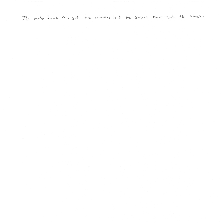

In [ ]:
import numpy as np
from keras.preprocessing import image
new_image = image.load_img('/content/drive/MyDrive/Bangkit/Dataset/train/one/w0002_s01_pPHR_r01.png', target_size = (224, 224))
new_image

Tampilkan label kelas

In [ ]:
training_dataset.class_indices

{'five': 0, 'four': 1, 'one': 2, 'three': 3, 'two': 4}

Buat prediksinya

In [ ]:
new_image = image.img_to_array(new_image)
new_image = np.expand_dims(new_image, axis = 0)
result = classifier.predict(new_image)

# if result[0][0] == 1:
#     prediction = 'It is a flower'
# else:
#     prediction = 'It is a car'

if result[0][0] != 0:
   prediction ='Very Bad'
elif result[0,1] != 0:
   prediction ='Bad'    
elif result[0,2] != 0:
   prediction ='Normal'
elif result[0,3] != 0:
   prediction ='Good'
else:
   prediction ='Very Good'  

print(prediction)

ValueError: ignored

### Menyimpan Model hasil Transfer Learning

In [ ]:
classifier.save('Rayuan.h5')

In [ ]:
# serialize model to JSON
model_json = classifier.to_json()
with open("Rayuan.json", "w") as json_file:
    json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("Rayuan.h5")
# print("Saved model to disk")
 
# # later...
 
# # load json and create model
# json_file = open('Rayuan.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)

## Trial and Error Own Architecture

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi lebih dari 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, 
        # karena kita merupakan masalah klasifikasi lebih dari 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

Found 1460 images belonging to 5 classes.
Found 979 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=32,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=100, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/100
32/32 - 6s - loss: 1.5783 - accuracy: 0.3203 - val_loss: 1.3499 - val_accuracy: 0.5500 - 6s/epoch - 174ms/step
Epoch 2/100
32/32 - 5s - loss: 1.5338 - accuracy: 0.3594 - val_loss: 1.4100 - val_accuracy: 0.4500 - 5s/epoch - 145ms/step
Epoch 3/100
32/32 - 5s - loss: 1.4524 - accuracy: 0.4062 - val_loss: 1.5882 - val_accuracy: 0.2500 - 5s/epoch - 146ms/step
Epoch 4/100
32/32 - 5s - loss: 1.4864 - accuracy: 0.4062 - val_loss: 1.4669 - val_accuracy: 0.4500 - 5s/epoch - 145ms/step
Epoch 5/100
32/32 - 6s - loss: 1.4248 - accuracy: 0.4219 - val_loss: 1.4885 - val_accuracy: 0.4000 - 6s/epoch - 183ms/step
Epoch 6/100
32/32 - 5s - loss: 1.4715 - accuracy: 0.3906 - val_loss: 1.3449 - val_accuracy: 0.4500 - 5s/epoch - 160ms/step
Epoch 7/100
32/32 - 6s - loss: 1.3715 - accuracy: 0.4297 - val_loss: 1.2291 - val_accuracy: 0.3500 - 6s/epoch - 187ms/step
Epoch 8/100
32/32 - 5s - loss: 1.4075 - accuracy: 0.4297 - val_loss: 1.2291 - val_accuracy: 0.6500 - 5s/epoch - 149ms/step
Epoch 9/100
32/3

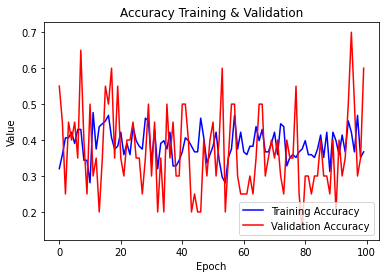

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy Training & Validation')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

### Test Model

Upload Gambar

In [ ]:
from google.colab import files
from keras.preprocessing import image

In [ ]:
def predict(image_upload):
  for fn in image_upload.keys():
    # predicting images
    path = fn
    img = image.load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
  
    print(fn)
    if classes[0][2] != 0:
      print('Very Bad')
    elif classes[0,4] != 0:
      print('Bad')    
    elif classes[0,3] != 0:
      print('Normal')
    elif classes[0,1] != 0:
      print('Good')
    else:
      print('Very Good')  

image_test = files.upload()


Saving w0009_s02_pLND_r01.png to w0009_s02_pLND_r01 (1).png


In [ ]:
train_generator.class_indices

{'five': 0, 'four': 1, 'one': 2, 'three': 3, 'two': 4}

w0009_s02_pLND_r01.png
Very Bad


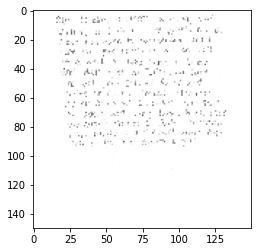

In [ ]:
predict(image_test)

# Classification Transfer Learning

## Import Library

In [ ]:
import numpy as np
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow import random

## Menginisasi Model

In [ ]:
vgg_model = tensorflow.keras.applications.vgg16.VGG16()

553476096/553467096 [==============================] - 5s 0us/step


## Menghapus Lapisan Terakhir

In [ ]:
ind_last_layer = len(vgg_model.layers)-1
number_last_removed_layer = 1

np.random.seed(42)
random.set_seed(42)

classifier= Sequential()
for count,layer in enumerate(vgg_model.layers):
    if count<=ind_last_layer-number_last_removed_layer:
        classifier.add(layer)

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

## Membekukan layer sehingga bobotnya tidak bisa diupdate

In [ ]:
for layer in classifier.layers:
    layer.trainable=False

## Tambah Lapisan Baru

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from pathlib import Path
import os.path
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
# classifier.add(Dense(1, activation='softmax'))    
# classifier.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
# classifier.add(MaxPooling2D(2,2))
# classifier.add(Flatten())
classifier.add(Dense(512, activation='relu'))
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(64, activation='relu'))
classifier.add(Dense(1, activation='softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

## Kompilasi Jaringan

In [ ]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Image Data Generator

Proses gambar dan sesuaikan

Buat generator data pelatihan dan pengujian

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

generate_train_data = ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)

generate_test_data = ImageDataGenerator(rescale =1./255)

Buat set data pelatihan dan pengujian

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
folder = Path('/content/drive/MyDrive/Bangkit/Dataset')

In [4]:
base_dir = folder
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
one_dir = os.path.join(base_dir, 'one')
two_dir = os.path.join(base_dir, 'two')
three_dir = os.path.join(base_dir, 'three')
four_dir = os.path.join(base_dir, 'four')
five_dir = os.path.join(base_dir, 'five')

In [5]:
train_one = os.path.join(train_dir, 'one')
val_one = os.path.join(validation_dir, 'one')

train_two = os.path.join(train_dir, 'two')
val_two = os.path.join(validation_dir, 'two')

train_three = os.path.join(train_dir, 'three')
val_three = os.path.join(validation_dir, 'three')

train_four = os.path.join(train_dir, 'four')
val_four = os.path.join(validation_dir, 'four')

train_five = os.path.join(train_dir, 'five')
val_five = os.path.join(validation_dir, 'five')

In [6]:
!nvidia-smi

Wed May 25 12:12:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
list_directory=[train_dir,validation_dir,train_one,val_one,
                train_two,val_two,train_three,val_three, train_four, val_four, train_five, val_five]
for i in list_directory:
  os.mkdir(i)

FileExistsError: ignored

## Train Test Split (40% data val)

In [7]:
import zipfile,os,shutil

In [8]:
train_one_dir, val_one_dir = train_test_split(os.listdir(one_dir), test_size = 0.40)
train_two_dir, val_two_dir = train_test_split(os.listdir(two_dir), test_size = 0.40)
train_three_dir, val_three_dir = train_test_split(os.listdir(three_dir), test_size = 0.40)
train_four_dir, val_four_dir = train_test_split(os.listdir(four_dir), test_size = 0.40)
train_five_dir, val_five_dir = train_test_split(os.listdir(five_dir), test_size = 0.40)

for file in train_one_dir:
  shutil.copy(os.path.join(one_dir, file), os.path.join(train_one, file))
for file in train_two_dir:
  shutil.copy(os.path.join(two_dir,file), os.path.join(train_two,file))
for file in train_three_dir:
  shutil.copy(os.path.join(three_dir,file), os.path.join(train_three,file))
for file in train_four_dir:
  shutil.copy(os.path.join(four_dir,file), os.path.join(train_four,file))
for file in train_five_dir:
  shutil.copy(os.path.join(five_dir,file), os.path.join(train_five,file))
for file in val_one_dir:
  shutil.copy(os.path.join(one_dir, file), os.path.join(val_one, file))
for file in val_two_dir:
  shutil.copy(os.path.join(two_dir,file), os.path.join(val_two,file))
for file in val_three_dir:
  shutil.copy(os.path.join(three_dir,file), os.path.join(val_three,file))
for file in val_four_dir:
  shutil.copy(os.path.join(four_dir,file), os.path.join(val_four,file))
for file in val_five_dir:
  shutil.copy(os.path.join(five_dir,file), os.path.join(val_five,file))

In [9]:
training_dataset = generate_train_data.flow_from_directory('/content/drive/MyDrive/Bangkit/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_datasetset = generate_test_data.flow_from_directory('/content/drive/MyDrive/Bangkit/Dataset/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

NameError: ignored

## VGG

In [ ]:
classifier.fit(training_dataset,
                         epochs = 10,
                         batch_size = 32,
                         validation_data = test_datasetset)

Epoch 1/10
7/7 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.2683

FileNotFoundError: ignored

### Memprediksi gambar baru Muat gambar dan tampilkan gambar


In [ ]:
import numpy as np
from keras.preprocessing import image
new_image = image.load_img('/content/drive/MyDrive/Bangkit/Dataset/train/one/w0002_s01_pPHR_r01.png', target_size = (224, 224))
new_image

### Tampilkan label kelas

In [ ]:
training_dataset.class_indices

### Buat prediksinya


In [ ]:
new_image = image.img_to_array(new_image)
new_image = np.expand_dims(new_image, axis = 0)
result = classifier.predict(new_image)

# if result[0][0] == 1:
#     prediction = 'It is a flower'
# else:
#     prediction = 'It is a car'

if result[0][0] != 0:
   prediction ='Very Bad'
elif result[0,1] != 0:
   prediction ='Bad'    
elif result[0,2] != 0:
   prediction ='Normal'
elif result[0,3] != 0:
   prediction ='Good'
else:
   prediction ='Very Good'  

print(prediction)

## Menyimpan Model hasil Transfer Learning

In [ ]:
classifier.save('Rayuan.h5')

In [ ]:
# serialize model to JSON
model_json = classifier.to_json()
with open("Rayuan.json", "w") as json_file:
    json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("Rayuan.h5")
# print("Saved model to disk")
 
# # later...
 
# # load json and create model
# json_file = open('Rayuan.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)

## Trial and Error Own Architecture

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zoom_range = 0.1,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zoom_range = 0.1,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi lebih dari 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, 
        # karena kita merupakan masalah klasifikasi lebih dari 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

Found 205 images belonging to 5 classes.
Found 329 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 256)      0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=32,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=100, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/100
32/32 - 12s - loss: 1.7575 - accuracy: 0.3906 - val_loss: 1.6129 - val_accuracy: 0.1500 - 12s/epoch - 369ms/step
Epoch 2/100
32/32 - 8s - loss: 1.5793 - accuracy: 0.3840 - val_loss: 1.5087 - val_accuracy: 0.4000 - 8s/epoch - 249ms/step
Epoch 3/100
32/32 - 9s - loss: 1.5531 - accuracy: 0.3750 - val_loss: 1.5471 - val_accuracy: 0.2500 - 9s/epoch - 276ms/step
Epoch 4/100
32/32 - 9s - loss: 1.5256 - accuracy: 0.3906 - val_loss: 1.6070 - val_accuracy: 0.2000 - 9s/epoch - 272ms/step
Epoch 5/100
32/32 - 7s - loss: 1.5257 - accuracy: 0.3680 - val_loss: 1.5019 - val_accuracy: 0.2000 - 7s/epoch - 209ms/step
Epoch 6/100
32/32 - 6s - loss: 1.5352 - accuracy: 0.3680 - val_loss: 1.4433 - val_accuracy: 0.5000 - 6s/epoch - 201ms/step
Epoch 7/100
32/32 - 9s - loss: 1.5710 - accuracy: 0.3750 - val_loss: 1.4605 - val_accuracy: 0.2500 - 9s/epoch - 268ms/step
Epoch 8/100
32/32 - 7s - loss: 1.5020 - accuracy: 0.3600 - val_loss: 1.5869 - val_accuracy: 0.3000 - 7s/epoch - 220ms/step
Epoch 9/100
32

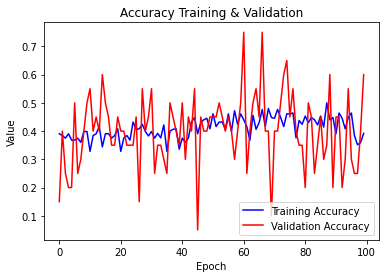

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy Training & Validation')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

## Test Model

### Upload Gambar

In [ ]:
from google.colab import files
from keras.preprocessing import image

In [ ]:
def predict(image_upload):
  for fn in image_upload.keys():
    # predicting images
    path = fn
    img = image.load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
  
    print(fn)
    if classes[0][2] != 0:
      print('Very Bad')
    elif classes[0,4] != 0:
      print('Bad')    
    elif classes[0,3] != 0:
      print('Normal')
    elif classes[0,1] != 0:
      print('Good')
    else:
      print('Very Good')  

image_test = files.upload()


Saving Untitled-1-Recovered-Recovered2_0000s_0000_Our London business is good, but Vienna and Berlin are quiet. M.jpg to Untitled-1-Recovered-Recovered2_0000s_0000_Our London business is good, but Vienna and Berlin are quiet. M.jpg


In [ ]:
train_generator.class_indices

{'five': 0, 'four': 1, 'one': 2, 'three': 3, 'two': 4}

Untitled-1-Recovered-Recovered2_0000s_0000_Our London business is good, but Vienna and Berlin are quiet. M.jpg
Very Bad


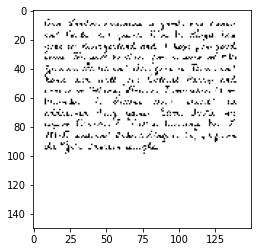

In [ ]:
predict(image_test)